# Exploratory Data Analysis
- Now that the data has been properly scraped and loaded, the code below performs an exploratory data analysis.

# Initial Cleaning

In [143]:
import pandas as pd

# Load the data
df = pd.read_csv('./data/song_data.csv')

# Glimpse the data
display(df.head(1))

# Remove the column "Unamed: 0"
df = df.drop(['Unnamed: 0'], axis=1)

# Glimpse the data afterwords
display(df.head(1))

,Unnamed: 0,Track Name,Artist Name,Album Name,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Insturmentalness,Liveness,Valence,Tempo,Duration MS,Time Signature
0,0,Hawthorn,Ishara,Hawthorn,45,0.209,0.0236,3,-25.44,1,0.0398,0.992,0.971,0.111,0.0862,68.913,153913,4


,Track Name,Artist Name,Album Name,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Insturmentalness,Liveness,Valence,Tempo,Duration MS,Time Signature
0,Hawthorn,Ishara,Hawthorn,45,0.209,0.0236,3,-25.44,1,0.0398,0.992,0.971,0.111,0.0862,68.913,153913,4


## Initial Understanding of the Data

In [144]:
df.describe()

,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Insturmentalness,Liveness,Valence,Tempo,Duration MS,Time Signature
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,8.880000e+02,888.000000
mean,35.380631,0.558866,0.621833,5.182432,-9.077961,0.627252,0.089105,0.327370,0.195428,0.208264,0.449190,123.907375,2.440314e+05,3.908784
std,21.966751,0.176511,0.268883,3.590738,5.908012,0.483808,0.103589,0.347212,0.344319,0.184585,0.261473,30.159103,2.242049e+05,0.426849
min,0.000000,0.066000,0.003880,0.000000,-37.355000,0.000000,0.024700,0.000002,0.000000,0.025700,0.002700,53.051000,4.102000e+04,1.000000
25%,19.000000,0.438000,0.437750,2.000000,-11.261000,0.000000,0.036500,0.012800,0.000000,0.096050,0.237500,100.042000,1.717802e+05,4.000000
50%,35.000000,0.576000,0.673500,5.000000,-7.554000,1.000000,0.050900,0.165500,0.000181,0.125000,0.427000,124.000000,2.165225e+05,4.000000
75%,51.000000,0.696000,0.850500,8.000000,-5.221750,1.000000,0.092850,0.629250,0.156250,0.277000,0.651250,141.979500,2.675765e+05,4.000000
max,88.000000,0.959000,0.997000,11.000000,1.424000,1.000000,0.949000,0.996000,0.987000,0.975000,0.981000,212.043000,3.814460e+06,5.000000


Some summary statistics:
- The average song popularity is 35.38
- The average song length is 4.0672 minutes

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        888 non-null    object 
 1   Artist Name       888 non-null    object 
 2   Album Name        888 non-null    object 
 3   Popularity        888 non-null    int64  
 4   Danceability      888 non-null    float64
 5   Energy            888 non-null    float64
 6   Key               888 non-null    int64  
 7   Loudness          888 non-null    float64
 8   Mode              888 non-null    int64  
 9   Speechiness       888 non-null    float64
 10  Acousticness      888 non-null    float64
 11  Insturmentalness  888 non-null    float64
 12  Liveness          888 non-null    float64
 13  Valence           888 non-null    float64
 14  Tempo             888 non-null    float64
 15  Duration MS       888 non-null    int64  
 16  Time Signature    888 non-null    int64  
dt

The data includes:
- 3 Objects
    * Track Name
    * Artist Name
    * Album Name
- 5 Integers
    * Popularity
    * Key
    * Mode
    * Duration MS
    * Time Signature
- 9 Floats
    * Dancability
    * Energy
    * Loudness
    * Speechiness
    * Acousticness
    * Insturmentalness
    * Liveness
    * Valence
    * Tempo

# Variable Cleaning

In [146]:
# Convert 'Duration MS' to 'Minutes'
df['Minutes'] = df['Duration MS'] / 6000
df.drop(columns=['Duration MS'], axis=1, inplace=True)

# Convert 'Insturmentalness' to 'Instrumentalness'
df = df.rename(columns={'Insturmentalness': 'Instrumentalness'})

# Convert popularity to 0-1 scale
df['Popularity'] = df['Popularity'] / 100

# Graphing the Distribution of Popularity
### Method 1: Histogram

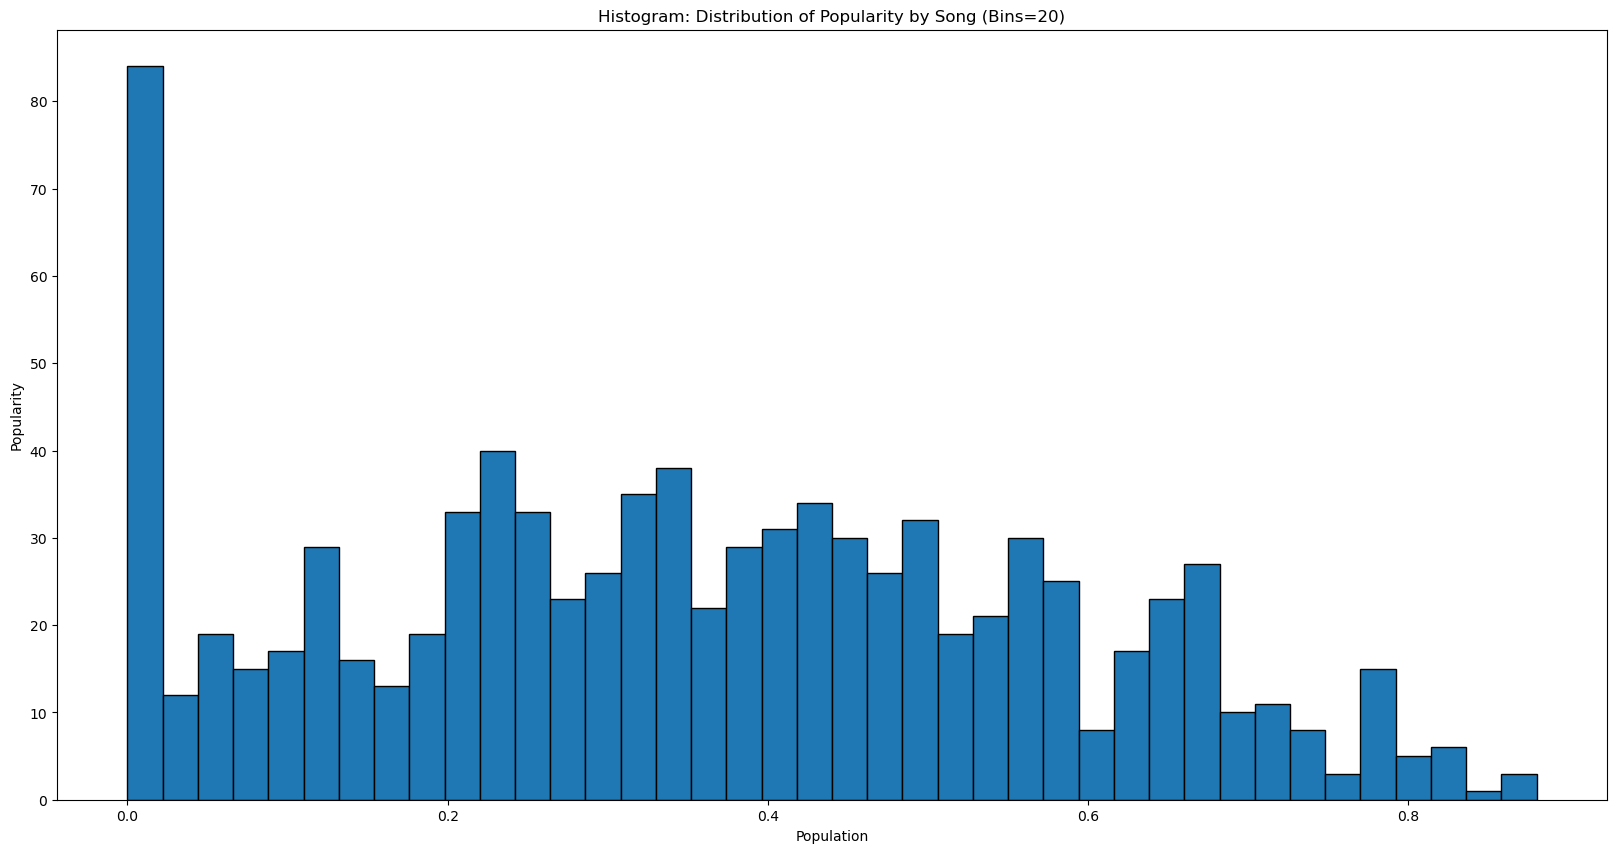

In [147]:
import matplotlib.pyplot as plt
import numpy as np

# Create plot of distribution
fig, ax = plt.subplots(figsize=(20,10))

# Histogram
ax.hist(df['Popularity'], edgecolor='black', bins=40)
plt.xlabel("Population")
plt.ylabel("Popularity")
plt.title("Histogram: Distribution of Popularity by Song (Bins=20)")
plt.show()

- The histogram shown by the plot provides evidence that the data could be normal. A Q-Q plot and Shaprio Test can further assess normality.
- There are many average popularity songs and only few high popularity songs. This suggests a long tail distribution with more data.
### Method 2: Q-Q Plot

In [148]:
from scipy.stats import shapiro 

# Make this example reproducible
np.random.seed(1)

# Perform Shapiro-Wilk test for normality
print(shapiro(df['Popularity']))

ShapiroResult(statistic=0.9731681361253585, pvalue=1.0122029006417344e-11)


- The p-value resulting from a shapiro test is almost zero. Therefore, there is sufficient evidence that the data does not come from a normal distribution.

# Assessing Distribution of All Predictor Variables
- The distributions of key numerical variables are assessed below. Variables are broken up by scale and further analyzed.

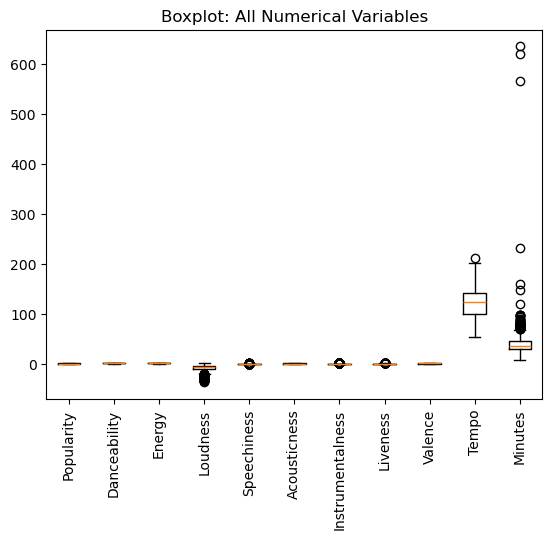

In [149]:
# Create numerical_vars to use for analysis
numerical_vars = df.drop(columns=['Track Name', 'Artist Name', 'Album Name', 'Key', 'Mode', 'Time Signature'])

# Basic boxplot
plt.boxplot(numerical_vars, labels=numerical_vars.columns);
plt.title("Boxplot: All Numerical Variables");
plt.xticks(rotation=90);


- There is a large number of outliers in the Minutes column.
- The variables 'Loudness', 'Tempo', and 'Minutes' have a different scale than the other variables.
- A boxplot with the 'Attribute' variables (the variables on the same scale), is included below.

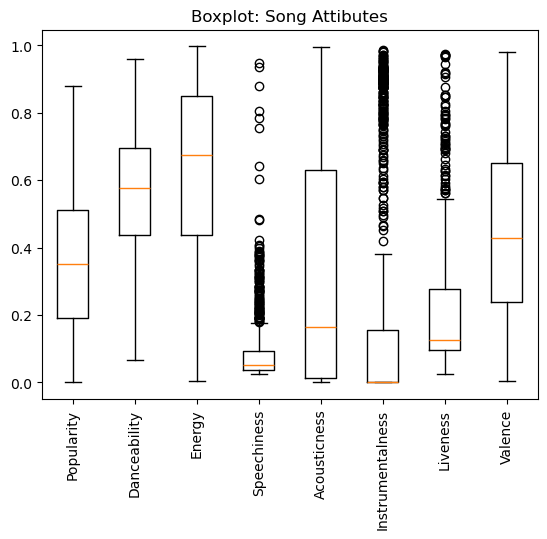

In [150]:
# Create set of variables without Minutes
attributes = df[[
    'Popularity',
    'Danceability',
    'Energy',
    'Speechiness',
    'Acousticness',
    'Instrumentalness',
    'Liveness',
    'Valence',
]]

# Basic boxplot
plt.boxplot(attributes, labels=attributes.columns);
plt.title('Boxplot: Song Attibutes');
plt.xticks(rotation=90);

# Correlation Analysis
- A correlation analysis between numerical variables is carried out below.

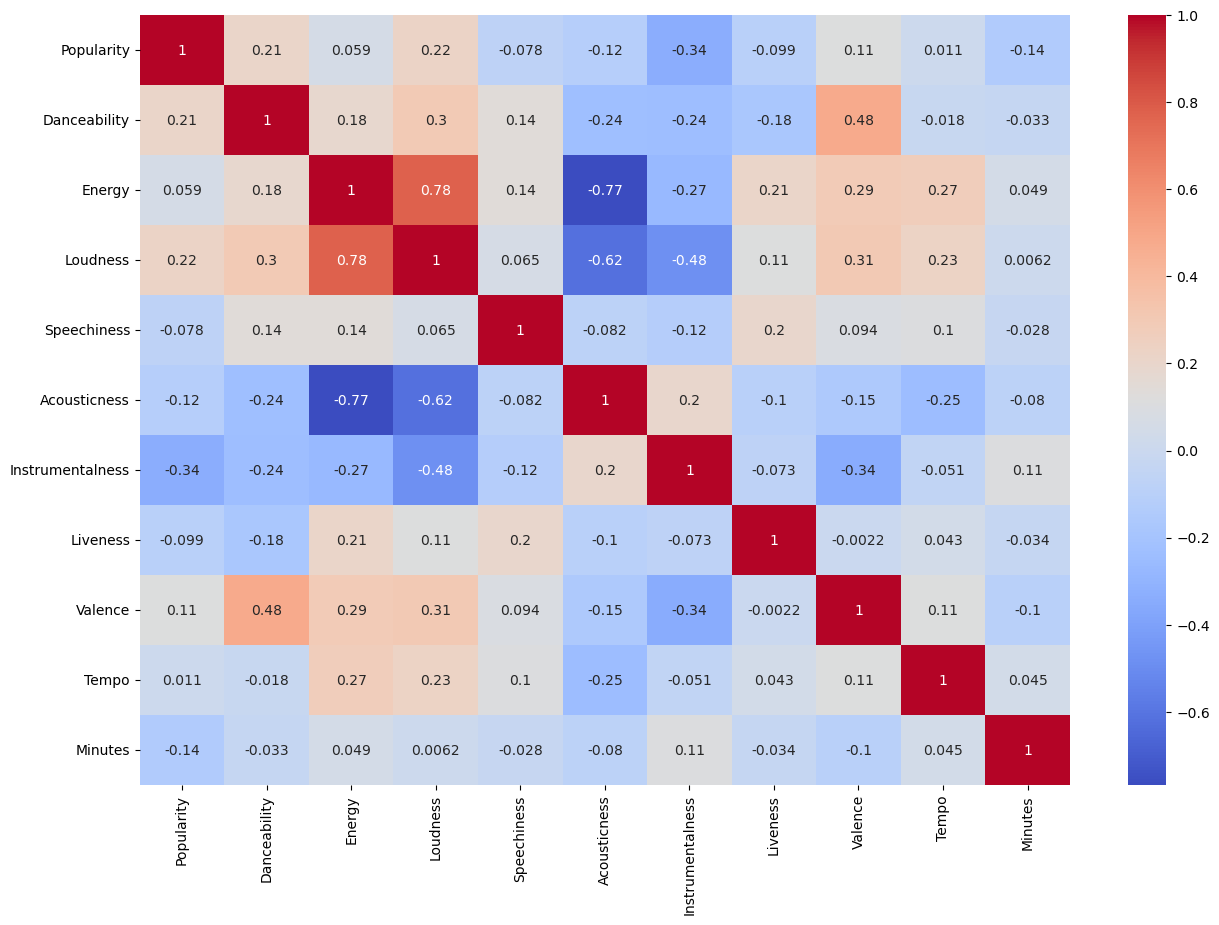

In [151]:
import seaborn as sns

# Correlation Matrix
plt.figure(figsize=(15,10))
sns.heatmap(numerical_vars.corr(), cmap='coolwarm', annot=True);


**Popularity**
- Popularity and Dancability are positively correlated
- Popularity and Loudness are positively correlated
- Popularity and Insturmentalness are negatively correlated
- Popularity and Minutes are negatively correlated
- Popularity and Acousticness are negatively correlated


**Other Correlations**
- Loudness and Energy have a very strong positive correlation
- Loudness and Valence have a strong negative correlation
- Loudness and Tempo have a strong positive correlation
- Loudness and Insturmentalness have a strong negative correlation
- Valence and Dancability have a strong positive correlation
- Valence and Loudness have a strong positive correlation
- Accousticness and Energy have a very strong negative correlation

# Diving Deeper into Relationships Between Strongly Correlated Variables

## Popularity vs Danceability

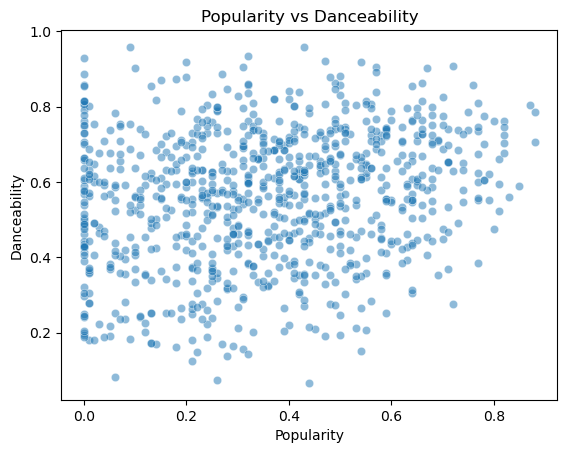

In [152]:
# Create function to quickly graph relationships
def scatterplot(var1, var2):
    sns.scatterplot(x=str(var1), y=str(var2), data=df, alpha = 0.5)
    plt.title(f'{str(var1)} vs {str(var2)}')
    plt.show()
    
# Use on Popularity and Dancability
scatterplot('Popularity', 'Danceability')

- It is possible that there is a correlation between Danceability and Popularity, but there is much noise.

## Popularity and Loudness

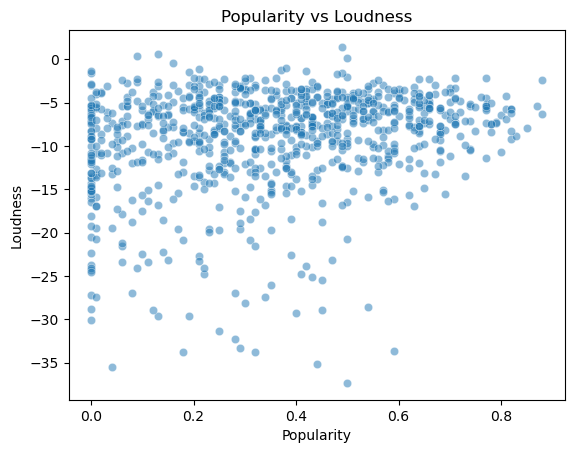

In [153]:
scatterplot('Popularity', 'Loudness')

## Popularity and Instrumentalness

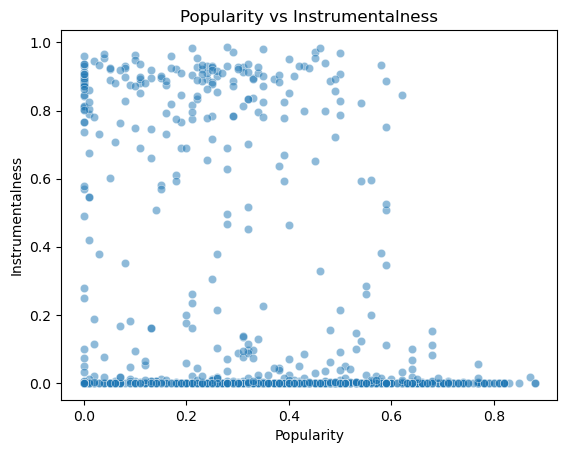

In [154]:
scatterplot('Popularity', 'Instrumentalness')

* The majority of songs are not instrumental.
* The majority of songs that are highly instrumental are not very popular.
* There are no highly instrumental songs above a popularity of 70%

## Popularity and Minutes

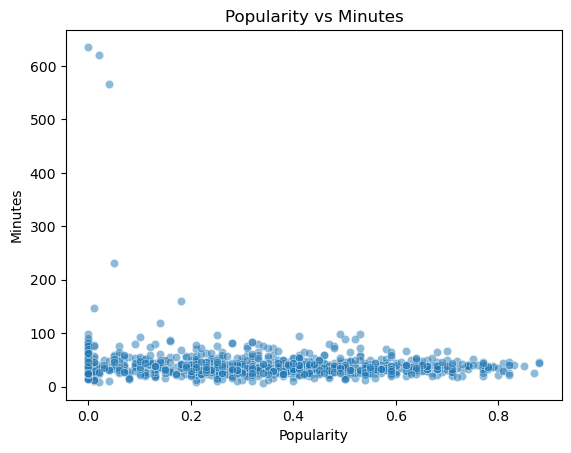

In [155]:
scatterplot('Popularity', 'Minutes')

As seen by the relationship between 'Popularity' and 'Minutes', there are a few songs that are incredibly long.

- Correlation Matrix between variables
- box plot, bar plot, violin plot, and pairplot to see; relationships and distribution
- Describe anything you find in the data after each visualization
- What data visualization helped you understand about data distribution

# Clustering

- The numerical variables are clustered into groups

## Creating Three Clusters

In [199]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale Numerical Variables
scaler = StandardScaler()
numerical_vars_scaled = scaler.fit_transform(numerical_vars)

# K-means clustering
kmeans_clusters = KMeans(n_clusters=3, random_state=1)
df['Cluster'] = kmeans_clusters.fit_predict(numerical_vars_scaled)

# Visualizing the cluster data
display(df[['Track Name', 'Artist Name', 'Cluster']].head(10))

,Track Name,Artist Name,Cluster
0,Hawthorn,Ishara,0
1,The Seed - Edit,Tony Allen,1
2,Lady Marian (2003 - Remaster),Clannad,0
3,Empires Lost to Time,Dark Tranquillity,2
4,Digane - Raphael Afro Vibe Remix Extended,Bob Sinclar,1
5,How He Works (feat. Nico Vega) - Coflo Remix,Louie Vega,2
6,Dia Perfeito,Natiruts,1
7,A State of Trance (ASOT 1183) - New Scoops!,Armin van Buuren,2
8,Flame In My Heart,George Jones,1
9,Cabin By The Sea - Live,Dirty Heads,1


## Principal Component Analysis

- Principal component analysis is a pre-requisite of visualizing clusters of higher dimensions, as it is impossible to graph above three dimensions.
- In the code-cell below, the data is reduced to two dimensions in the columns 'Principal Component 1' and 'Principal Component 2'

In [203]:
# Initialize the PCA object
pca = PCA(n_components=2)

# Transform the scaled numerical variables using PCA
principal_components = pca.fit_transform(numerical_vars_scaled)

# Assign principal components to the data
df['Principal Component 1'] = principal_components[:, 0]
df['Principal Component 2'] = principal_components[:, 1]

# Print the principal components
print(principal_components)

[[-5.27329906  0.46842507]
 [ 0.23546948  0.11909632]
 [-4.51504951  0.23321027]
 ...
 [-3.79257154  0.6753273 ]
 [ 0.58101369 -1.52707779]
 [ 0.38878958  1.72817608]]


- Above are the two principal components, each stored in a vector.

## Visualizing the Clusters

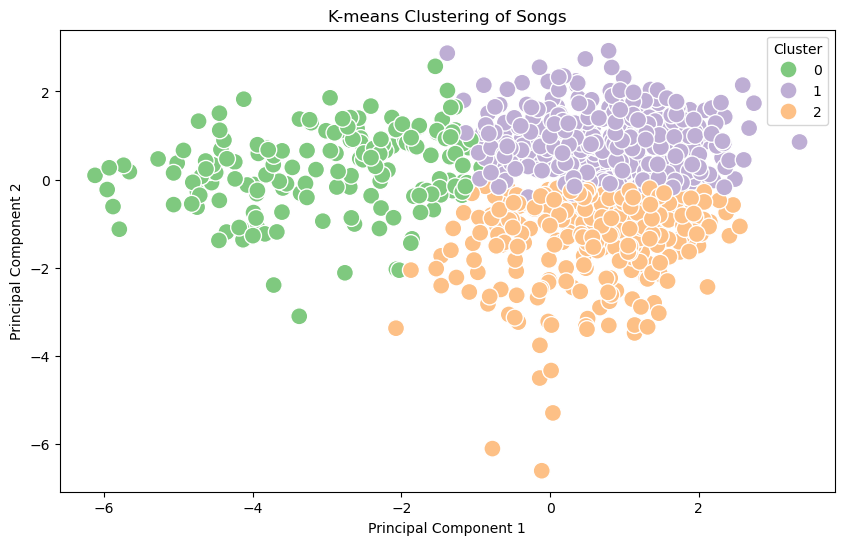

In [204]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=df, palette='Accent', hue='Cluster', s=150)
plt.title('K-means Clustering of Songs')
plt.show()

- There are three distinct clusters. They are analyzed below.

In [157]:
# Cluster Centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=numerical_vars.columns)
centroids['Cluster'] = centroids.index
display(centroids)

,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Minutes,Cluster
0,-0.474046,-0.386670,0.680489,0.396836,0.295212,-0.598506,0.144179,0.586740,-0.262142,0.420415,0.206248,0
1,0.501745,0.619973,0.137558,0.290663,-0.035925,-0.183486,-0.438548,-0.282247,0.560371,-0.077608,-0.135674,1
2,-0.377044,-0.806027,-1.488088,-1.365648,-0.419403,1.456665,0.791139,-0.334771,-0.877788,-0.534711,-0.031423,2


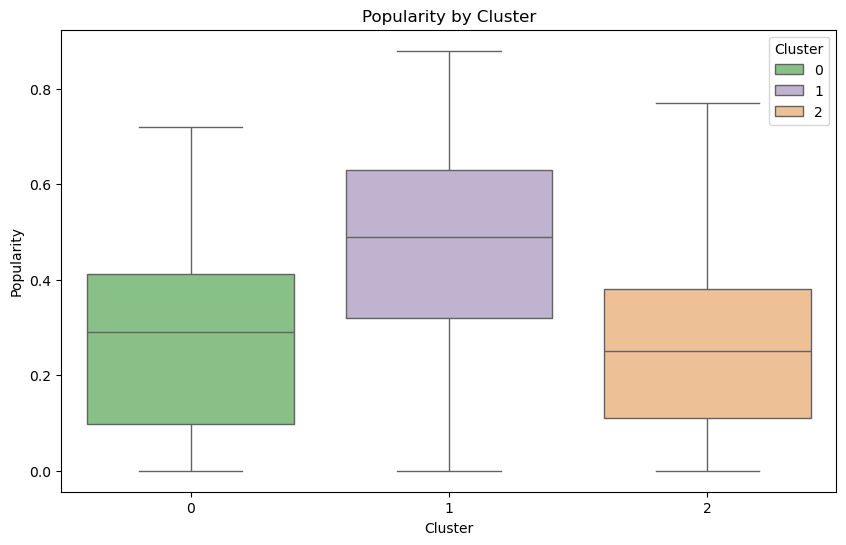

In [200]:
# Graph cluster by popularity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Popularity', data=df, hue='Cluster', palette='Accent');
plt.title('Popularity by Cluster')
plt.show()

- The bar plot shows that songs in cluster 1 have the highest popularity

## Understanding the Features of each Cluster

- In the code-cell below, a function to plot the distribution of each cluster is created.

In [211]:
# Bar plot function for each cluster
def barplot(cluster):
    # Get the cluster data
    data = centroids[centroids['Cluster'] == cluster].drop(columns=['Cluster', 'Popularity'])

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(data.columns, data.iloc[0])
    plt.title(f'Cluster {cluster} Distribution of Features')
    plt.xticks(rotation=90)
    plt.ylabel('Value')
    plt.show()

- In the code-cell below, the barplots are produced, showing the breakdown of each cluster's features

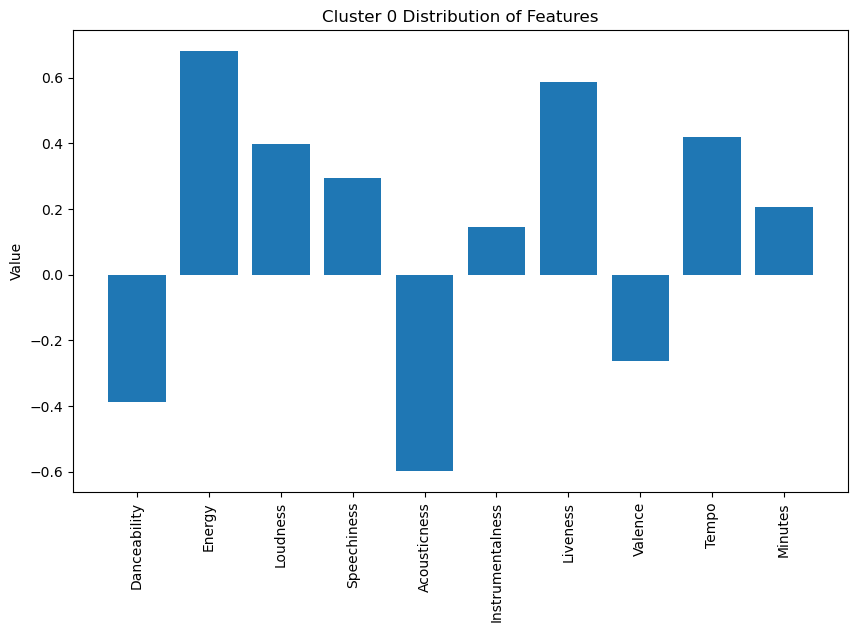

In [212]:
# Create a barplot for cluster 0
barplot(0)

- Cluster 0 likely is comprised of a significant number of live performances, soundtracks, and classical music.
- Cluster 0 has High levels of energy, liveness, tempo, and loudness, with very low levels of acousticness, and low levels of dancability.
- Songs in cluster 1 tend to be longer than the average song, which is common for live renditions of songs.

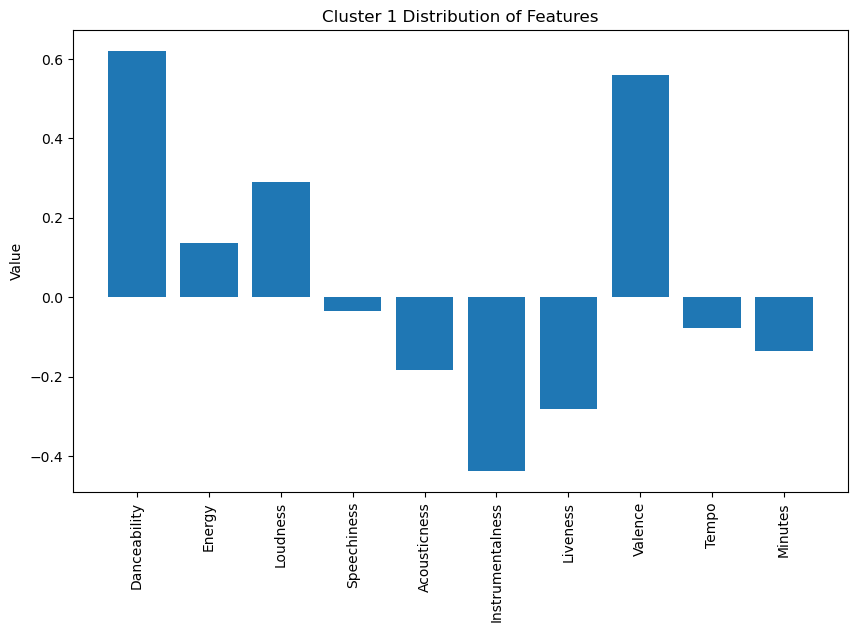

In [213]:
# Create a barplot for cluster 1
barplot(1)

- Cluster 1 likely represnts dance, pop, and other forms of modern music.
- Cluster 1 has very high level of dancability, valence, with moderate loudness, and very low levels of instrumentalness, liveness, and acousticness.
- Songs in Cluster 1 tend to be shorter than the average song in the dataset.

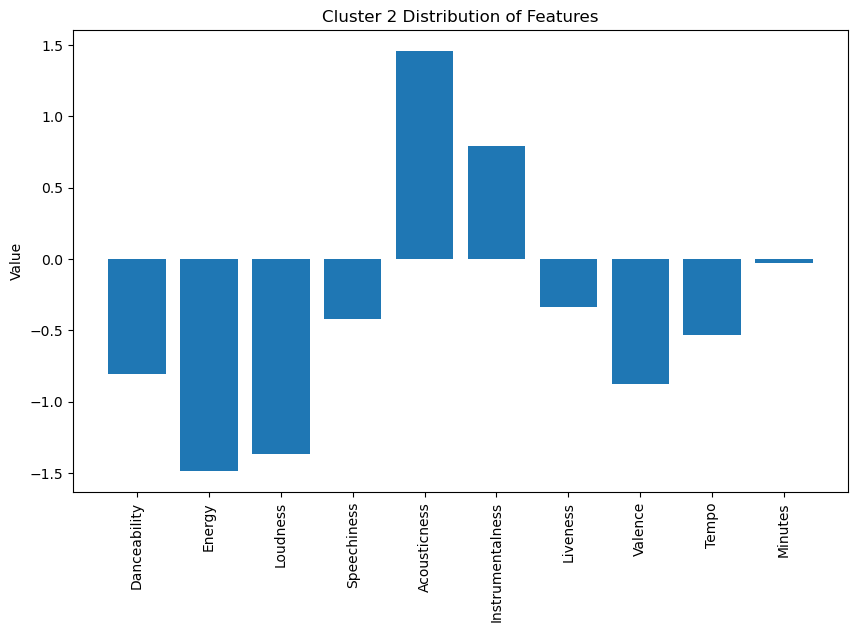

In [214]:
# Create a barplot for cluster 2
barplot(2)

- Cluster 2 likely represents accoustic and instrumental music.
- Cluster 2 has very high levels of accousticness, instrumentalness, and very low levels of energy, loudness, dancability, and valence.
- These songs tend to be slightly below average length.

# Testing Accuracy of Clusters

The code below takes a random sample of 5 data points from each cluster. Let's see if the clusters match the genre!

## Cluster 0

In [220]:
# Random sample of 5 songs from cluster 0
c0 = df[df['Cluster'] == 0][['Track Name', 'Artist Name', 'Popularity', 'Cluster']]
display(c0.sample(n=5))

,Track Name,Artist Name,Popularity,Cluster
697,三暝三日,Jacky Wu,0.39,0
615,"Nee En Aakasha Theerangalil - From ""Jananam 19...",Govind Vasantha,0.35,0
700,"Desert Moon - From ""Aladdin""",Mena Massoud,0.39,0
390,"8 Geistliche Gesänge, Op. 138: No. 4, Unser li...",Dresdner Kreuzchor,0.00,0
278,Moon Temple,Karunesh,0.35,0


- All of the songs in this random sample of **Cluster Zero** fall within **live, classical, or soundtrack music.**
- Example - **Moon Temple (Karunesh)**: https://open.spotify.com/track/49QWQdD7AfaiaehDLLy6Ve?si=5802c161b99c4a9d

## Cluster 1

In [226]:
# Random sample of 5 songs from cluster 1
c1 = df[df['Cluster'] == 1][['Track Name', 'Artist Name', 'Popularity', 'Cluster']]
display(c1.sample(n=5))

,Track Name,Artist Name,Popularity,Cluster
134,Night or Day,Chris Cohen,0.32,1
322,ode to rahsaan,berlioz,0.56,1
777,The Spectre,Alan Walker,0.71,1
747,A História de Lily Braun,Maria Gadú,0.34,1
575,Road Song,Ikebe Shakedown,0.47,1


- The songs in the **Cluster One** contain **dance and modern music**, as predicted by cluster 1.
- **Example - ode to rasaan (berlioz)**: https://open.spotify.com/track/2L6sbcKSPsXPW6x8lyiEsU?si=81cf41b19f304e88

# Cluster 2

In [235]:
# Random sample of 5 songs from cluster 2
c2 = df[df['Cluster'] == 2][['Track Name', 'Artist Name', 'Popularity', 'Cluster']]
display(c2.sample(n=5))

,Track Name,Artist Name,Popularity,Cluster
434,春光乍洩 - Euro Trash Mix,Anthony Wong,0.02,2
447,Helsinki Scorchin' - Edit,Super8 & Tab,0.15,2
728,女人夢,詹雅雯,0.35,2
504,One Last Breath,Creed,0.77,2
118,Fontanel,Eartheater,0.38,2


- **Cluster 2** seems to have more variation from this random sample, containing a wider variety of songs.
- Despite the barplot revealing high levels of instrumentalness acousticness and instrumentalness, songs from this random sample seem to be very high in energy.
- Example 1 - **Return of Da Source (Rotterdam Termination Source)**: https://open.spotify.com/track/6pY22aMjOh5lP7EC6cyT3C?si=f396ebc060f34b0d
- Example 2 - **One Last Breath (Creed)**: https://open.spotify.com/track/42T2QQv3xgBlpQxaSP7lnK?si=ad1f2c9b408a465c
- Example 3 - **God is Dead (Black Sabbath)**: https://open.spotify.com/track/3IKJNHnVZ2bXGjAFBJiUYo?si=25abf65d59a44ad2
- Upon a further listen, this cluster seems to contain **metal, punk, hard dance music, among other intense genres**.

Increasing the number of clusters in the k-means clustering algorithm would likely cause Cluster 2 to be broken apart more quickly than Cluster 0 and Cluster 1.

# Conclusion

The results of this exploratory data analysis show that song popularity indeed a factor of a song's sonic qualities. 

*A song is most likely to be **popular** if it has...*

**...High Levels Of:**
- Danceability
- Valence
- Loudness

**...Low Levels Of**
- Instrumentalness
- Liveness
- Accousticness